In [ ]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
sentences = df['review']
labels = df['sentiment'].map({'negative': 0, 'positive': 1})

In [5]:
labels

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(np.array(sentences), np.array(labels), train_size=0.8, random_state=42)

In [7]:
# X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.5, random_state=42)

In [8]:
print(f'X train Shape : {X_train.shape}')
print(f'y train Shape : {y_train.shape}')
print()
# print(f'X val Shape : {X_val.shape}')
# print(f'y val Shape : {y_val.shape}')
# print()
print(f'X test Shape : {X_test.shape}')
print(f'y test Shape : {y_test.shape}')

X train Shape : (40000,)
y train Shape : (40000,)

X test Shape : (10000,)
y test Shape : (10000,)


In [9]:
total_words = 1000
max_length = 120

In [10]:
tokenizer = Tokenizer(num_words=total_words,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [11]:
len(tokenizer.word_index)

112281

In [12]:
train_seq = tokenizer.texts_to_sequences(X_train)
train_padd = pad_sequences(train_seq,maxlen=max_length,truncating='post')

In [13]:
# val_seq = tokenizer.texts_to_sequences(X_val)
# val_padd = pad_sequences(val_seq,maxlen=max_length,truncating='post')

In [14]:
test_seq = tokenizer.texts_to_sequences(X_test)
test_padd = pad_sequences(test_seq,maxlen=max_length,truncating='post')

In [15]:
max_seq_len = max([len(x) for x in train_seq])

In [16]:
max_seq_len

2493

In [17]:
# example on train 
index = 5
print(f'Text :\n{X_train[index]}\n\n')
print(f'Sequence :\n{train_seq[index]}\n\n')
print(f'Padded Sequence :\n{train_padd[index]}\n\n')

Text :
I don't know how this movie received so many positive reviews on this site! I'm a big vonnegut fan and am very familiar with the story this Showtime original film bastardized beyond belief, but even if I wasn't, the poor acting, VERY poor casting (Sean Astin as the brilliant, athletic, and all around individual, Harrison?? The guy's completely generic!) and sub-standard writing rendered this tripe barely watchable. Someone pointed out how cute that Maculay Culkin line was. If you read that and thought that was pure comic brilliance (sadly, it probably was the most INTENTIONALLY funny part of the movie), maybe you'll like this movie. But if you're a Vonnegut fan or not completely insane, don't see it. Please.


Sequence :
[11, 90, 119, 87, 12, 18, 1, 35, 108, 1, 826, 21, 12, 1, 145, 4, 194, 1, 324, 3, 236, 52, 1, 17, 2, 63, 12, 1, 210, 20, 1, 667, 1, 19, 58, 44, 11, 292, 2, 334, 113, 52, 334, 1, 1, 1, 15, 2, 512, 1, 3, 30, 184, 1, 1, 2, 1, 338, 1, 3, 1, 1, 487, 1, 12, 1, 1, 1, 29

In [18]:
# # example on val 
# index = 5
# print(f'Text :\n{X_val[index]}\n\n')
# print(f'Sequence :\n{val_seq[index]}\n\n')
# print(f'Padded Sequence :\n{val_padd[index]}\n\n')

In [19]:
# example on val 
index = 5
print(f'Text :\n{X_test[index]}\n\n')
print(f'Sequence :\n{test_seq[index]}\n\n')
print(f'Padded Sequence :\n{test_padd[index]}\n\n')

Text :
I've watched this movie on a fairly regular basis for most of my life, and it never gets old. For all the snide remarks and insults (mostly from David Spade), "Tommy Boy" has a giant heart. And that's what keeps this movie funny after all these years.<br /><br />Tommy Callahan (Chris Farley) is the son of Big Tom Callahan (Brian Dennehy), master car parts salesman, and has ridden on that all his life. But after his died dies on his wedding day, Tommy learns that the company is in debt, and about to be bought by Ray Zalinsky (Dan Akroyd), the owner of a huge car parts company. So in order to save the company, Tommy has to go on the road to sell the company's new brake pads. Along for the ride, though not by choice, is Richard Hayden (David Spade) a former classmate of Tommy's who was Big Tom's right-hand man.<br /><br />The movie rides on the chemistry between the two SNL stars (and real-life best friends) Chris Farley and David Spade. The duo has enough comic energy going betwee

In [20]:
embedding_dim = 16
model = Sequential([
        Embedding(total_words,embedding_dim,input_length=max_length),
        Bidirectional(LSTM(64,return_sequences=True)),
        Bidirectional(LSTM(32)),
        
        Dense(6,activation='relu'),
        Dense(1,activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 bidirectional (Bidirection  (None, 120, 128)          41472     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 99085 (387.05 KB)
Trainable params: 99085 

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau ,EarlyStopping
callbacks = [
            EarlyStopping(patience = 10, verbose=1),
            ReduceLROnPlateau(factor = 0.5, patience = 3, min_lr = 0.000001, verbose=1),
            ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True,
            verbose=1)

    ]

In [23]:
model.compile(optimizer=Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_padd,y_train,epochs=20,validation_data=(test_padd,y_test),callbacks=[callbacks])

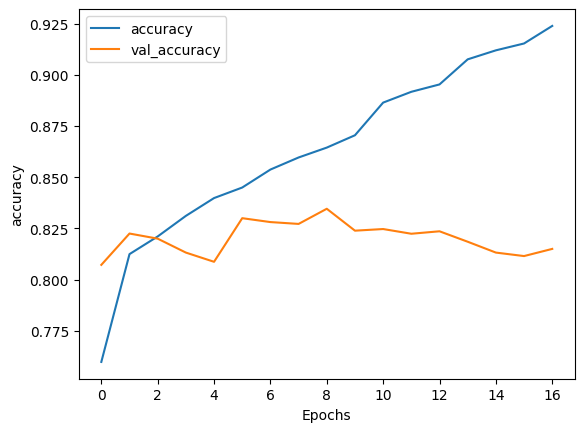

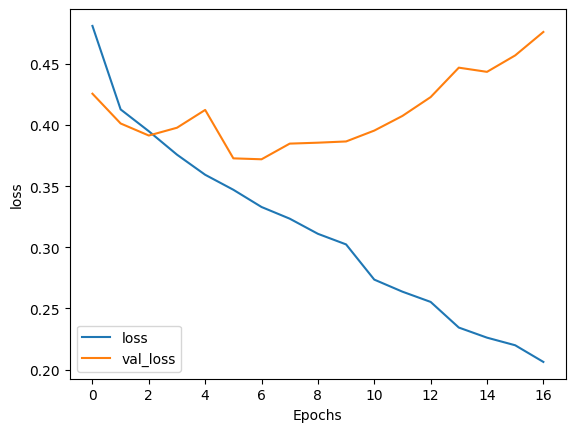

In [25]:
def plot_graphs(history, string):
        plt.plot(history.history[string])
        plt.plot(history.history['val_'+string])
        plt.xlabel("Epochs")
        plt.ylabel(string)
        plt.legend([string, 'val_'+string])
        plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [26]:
model.evaluate(test_padd,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.4762 - accuracy: 0.8150


[0.47621485590934753, 0.8149999976158142]